# Importing Libaries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
import itertools
from sklearn.feature_extraction.text import CountVectorizer

# Loading Data

In [2]:
#df=pd.read_csv('C:\\Users\\User\\dataset4-800.csv')
#df=pd.read_csv('C:\\Users\\User\\dataset3-500.csv')
#df=pd.read_csv('C:\\Users\\User\\dataset2-400.csv')
df=pd.read_csv('C:\\Users\\User\\dataset1-350.csv')
#df=pd.read_csv('C:\\Users\\User\\Kaggle400TEST.csv')
#df=pd.read_csv('C:\\Users\\User\\kaggle.csv')

In [3]:
df.head(10)

,sl no,headline,body,label
0,1,Concern over rapid rise in COVID-19 cases in S...,There is growing concern that South Africa's h...,1
1,2,NBA to Trump: Resign or We’ll Never Play Again...,The National Basketball Association recently s...,0
2,3,"COVID-19 No Vaccine Needed, There Is Already A...","Dr. Richard Bartlett, a Dallas MD who previous...",0
3,4,USA Presidential Candidate Joe Biden Tests Pos...,"Joe Biden, the Democratic presidential candida...",0
4,5,All Test Subjects of Bill Gates’ Vaccine Ended...,What could possibly go wrong with fast-trackin...,0
5,6,Cameroon: When Covid-19 Sways Cash-Strapped Ca...,Prior to the onset of the coronavirus pandemic...,1
6,7,"BREAKING: Coronavirus Hits 15% Fatality Rate, ...",BREAKING: The U.S. news media is currently run...,0
7,8,Coronavirus in Scotland: Peterhead primary clo...,NHS Grampian said it was working to identify c...,1
8,9,"Indonesia deploys 83,566 police, army personne...","Indonesia has deployed 83,566 police and army ...",1
9,10,New Evidence Shows Wearing Face Mask Can Help ...,"Dr. Russell Blaylock, a retired U.S. neurosurg...",0


In [4]:
X=df.drop('label',axis=1)

In [5]:
X.head()

,sl no,headline,body
0,1,Concern over rapid rise in COVID-19 cases in S...,There is growing concern that South Africa's h...
1,2,NBA to Trump: Resign or We’ll Never Play Again...,The National Basketball Association recently s...
2,3,"COVID-19 No Vaccine Needed, There Is Already A...","Dr. Richard Bartlett, a Dallas MD who previous..."
3,4,USA Presidential Candidate Joe Biden Tests Pos...,"Joe Biden, the Democratic presidential candida..."
4,5,All Test Subjects of Bill Gates’ Vaccine Ended...,What could possibly go wrong with fast-trackin...


In [6]:
y=df['label']

In [7]:
y.shape

(350,)

In [8]:
y.head

<bound method NDFrame.head of 0      1
1      0
2      0
3      0
4      0
      ..
345    1
346    0
347    1
348    0
349    0
Name: label, Length: 350, dtype: int64>

In [9]:
df.shape

(350, 4)

In [10]:
df = df.dropna()

In [11]:
df.shape

(349, 4)

In [12]:
df

,sl no,headline,body,label
0,1,Concern over rapid rise in COVID-19 cases in S...,There is growing concern that South Africa's h...,1
1,2,NBA to Trump: Resign or We’ll Never Play Again...,The National Basketball Association recently s...,0
2,3,"COVID-19 No Vaccine Needed, There Is Already A...","Dr. Richard Bartlett, a Dallas MD who previous...",0
3,4,USA Presidential Candidate Joe Biden Tests Pos...,"Joe Biden, the Democratic presidential candida...",0
4,5,All Test Subjects of Bill Gates’ Vaccine Ended...,What could possibly go wrong with fast-trackin...,0
...,...,...,...,...
345,346,"Ethiopia’s COVID-19 cases surpass 27,000",Ethiopia’s confirmed COVID-19 cases reached 27...,1
346,347,Hair Weave and Lace Front Made In China May Co...,It may be time to show us what your scalp and ...,0
347,348,"Governor of Venezuela's capital district, key ...","Dario Vivas, the governor of Venezuela's capit...",1
348,349,Russia Did Exposes COVID-19 With Scientific Da...,Russia has just released very important data w...,0


In [13]:
messages=df.copy()

In [14]:
messages.reset_index(inplace=True)

In [15]:
messages.head(40)

,index,sl no,headline,body,label
0,0,1,Concern over rapid rise in COVID-19 cases in S...,There is growing concern that South Africa's h...,1
1,1,2,NBA to Trump: Resign or We’ll Never Play Again...,The National Basketball Association recently s...,0
2,2,3,"COVID-19 No Vaccine Needed, There Is Already A...","Dr. Richard Bartlett, a Dallas MD who previous...",0
3,3,4,USA Presidential Candidate Joe Biden Tests Pos...,"Joe Biden, the Democratic presidential candida...",0
4,4,5,All Test Subjects of Bill Gates’ Vaccine Ended...,What could possibly go wrong with fast-trackin...,0
5,5,6,Cameroon: When Covid-19 Sways Cash-Strapped Ca...,Prior to the onset of the coronavirus pandemic...,1
6,6,7,"BREAKING: Coronavirus Hits 15% Fatality Rate, ...",BREAKING: The U.S. news media is currently run...,0
7,7,8,Coronavirus in Scotland: Peterhead primary clo...,NHS Grampian said it was working to identify c...,1
8,8,9,"Indonesia deploys 83,566 police, army personne...","Indonesia has deployed 83,566 police and army ...",1
9,9,10,New Evidence Shows Wearing Face Mask Can Help ...,"Dr. Russell Blaylock, a retired U.S. neurosurg...",0


In [16]:
y=messages['label']

# Joining the headline and body

In [17]:
messages = messages.headline+str(' ')+messages.body
#messages = messages.title+str(' ')+messages.text
messages.head(40)

0     Concern over rapid rise in COVID-19 cases in S...
1     NBA to Trump: Resign or We’ll Never Play Again...
2     COVID-19 No Vaccine Needed, There Is Already A...
3     USA Presidential Candidate Joe Biden Tests Pos...
4     All Test Subjects of Bill Gates’ Vaccine Ended...
5     Cameroon: When Covid-19 Sways Cash-Strapped Ca...
6     BREAKING: Coronavirus Hits 15% Fatality Rate, ...
7     Coronavirus in Scotland: Peterhead primary clo...
8     Indonesia deploys 83,566 police, army personne...
9     New Evidence Shows Wearing Face Mask Can Help ...
10    Good News: Coronavirus Destroyed By Chlorine D...
11    Hydroxychloroquine is why Uganda, with a popul...
12    BILL GATES: THE CATHOLIC RELIGION MAY HAVE TO ...
13    Italian Parliamentarian Calls For The Arrest o...
14    This is Fraud: 10% of Reported COVID-19 Deaths...
15    Pope Francis Tests Positive For Coronavirus, V...
16    U.K. hospitals struggle as new coronavirus var...
17    Covid19: When will Britons be allowed to v

# Data Pre Processing

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
corpus[17]

'covid briton allow visit franc non resid uk nation permit enter eu brexit even urgent famili reason countri coronaviru case significantli reduc non french peopl longer enter franc uk januari except resid foreign return home limit case due eu mass ban non eu countri coronaviru pandem visitor australia rwanda new zealand china reciproc south korea singapor thailand japan current allow enter eu countri deem viru control measur follow separ hour travel ban franc impos uk new strain covid uk leav european area januari brexit treat non eu countri american abl visit franc sinc march british visitor includ second home owner abl come last year transit period'

# Applying Countvectorizer


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [22]:
X.shape

(349, 5000)

In [23]:
y.shape

(349,)

# Divide the dataset into Train and Test

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

In [25]:
X_train.shape

(233, 5000)

In [26]:
X_test.shape

(116, 5000)

In [27]:
y_test.shape

(116,)

In [28]:
y_train.shape

(233,)

In [29]:
cv.get_feature_names()[10:20]

['acceler',
 'accept',
 'access',
 'accident',
 'accommod',
 'accompani',
 'accord',
 'accord cdc',
 'accord data',
 'accord govern']

In [30]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [31]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [32]:
count_df

,abbott,abil,abl,abort,abroad,absolut,abstract,abus,academ,academi,...,youngster,youth,youth day,youtub,zambia,zambian,zealand,zero,zinc,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Confusion matrix

In [33]:
import matplotlib.pyplot as plt

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultinomialNB Algorithm

In [35]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

accuracy:   0.853
Confusion matrix, without normalization


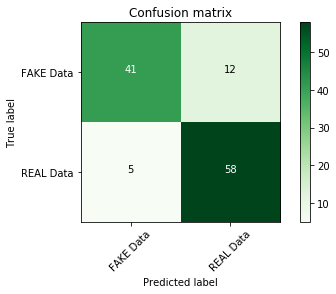

In [36]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score) 
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        53
           1       0.83      0.92      0.87        63

    accuracy                           0.85       116
   macro avg       0.86      0.85      0.85       116
weighted avg       0.86      0.85      0.85       116



# Passive Aggressive Classifier Algorithm

In [38]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAC = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.879
Confusion matrix, without normalization


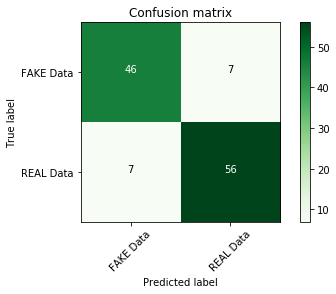

In [39]:
PAC.fit(X_train, y_train)
pred = PAC.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        53
           1       0.89      0.89      0.89        63

    accuracy                           0.88       116
   macro avg       0.88      0.88      0.88       116
weighted avg       0.88      0.88      0.88       116



# Logistic Regression

accuracy:   0.862
Confusion matrix, without normalization


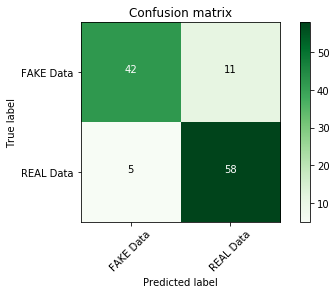

In [41]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(solver = 'liblinear', ).fit(X_train, y_train)

pred = lr.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        53
           1       0.84      0.92      0.88        63

    accuracy                           0.86       116
   macro avg       0.87      0.86      0.86       116
weighted avg       0.86      0.86      0.86       116



# SVM Classifier

accuracy:   0.845
Confusion matrix, without normalization


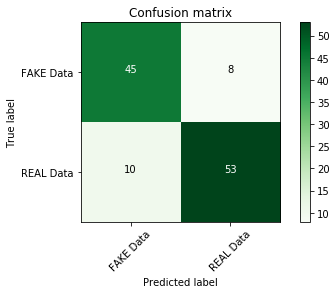

In [43]:
from sklearn import svm
linear_svm=svm.SVC(kernel='linear')
linear_svm.fit(X_train,y_train)
pred = linear_svm.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
SVM = score
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [44]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        53
           1       0.87      0.84      0.85        63

    accuracy                           0.84       116
   macro avg       0.84      0.85      0.84       116
weighted avg       0.85      0.84      0.85       116

